In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv("/content/smart_home_energy_usage_dataset.csv")

print(data.head())
print(data.info())


             timestamp  home_id  energy_consumption_kWh  \
0  2023-01-01 00:00:00       44                    2.87   
1  2023-01-01 01:00:00       81                    0.56   
2  2023-01-01 02:00:00       94                    4.49   
3  2023-01-01 03:00:00       20                    2.13   
4  2023-01-01 04:00:00        3                    2.74   

   temperature_setting_C occupancy_status     appliance  \
0                   22.1         Occupied  Refrigerator   
1                   15.4         Occupied          HVAC   
2                   22.4         Occupied   Electronics   
3                   24.6       Unoccupied    Dishwasher   
4                   21.4       Unoccupied          HVAC   

   usage_duration_minutes  season day_of_week  holiday  
0                     111  Spring      Sunday        0  
1                     103  Summer      Sunday        0  
2                      12  Autumn      Sunday        0  
3                      54  Autumn      Sunday        0  
4    

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['dayofweek'] = data['timestamp'].dt.dayofweek
# Removed the line attempting to map 'usage_state' as it doesn't exist
X = data[['hour','dayofweek','energy_consumption_kWh', 'temperature_setting_C', 'occupancy_status', 'season', 'holiday']]
y = data['appliance']

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format="%d-%m-%Y %H:%M")

data['hour'] = data['timestamp'].dt.hour
data['dayofweek_num'] = data['timestamp'].dt.dayofweek  # Monday=0


In [ ]:
label_enc = LabelEncoder()
data['occupancy_status'] = label_enc.fit_transform(data['occupancy_status'])
data['season'] = label_enc.fit_transform(data['season'])
data['day_of_week'] = label_enc.fit_transform(data['day_of_week'])
data['appliance'] = label_enc.fit_transform(data['appliance'])


In [ ]:
X = data[['hour', 'dayofweek_num', 'energy_consumption_kWh',
          'temperature_setting_C', 'occupancy_status',
          'season', 'holiday']]
y = data['appliance']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.16589

 Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.26      0.20     33302
           1       0.17      0.19      0.18     33422
           2       0.16      0.16      0.16     33271
           3       0.17      0.15      0.16     33499
           4       0.17      0.13      0.15     33427
           5       0.17      0.11      0.13     33079

    accuracy                           0.17    200000
   macro avg       0.17      0.17      0.16    200000
weighted avg       0.17      0.17      0.16    200000


Confusion Matrix:
 [[8805 6366 5342 4881 4206 3702]
 [8940 6252 5246 4900 4236 3848]
 [8903 6349 5200 4766 4258 3795]
 [8838 6399 5336 4866 4264 3796]
 [8815 6279 5345 4966 4322 3700]
 [8852 6199 5095 4872 4328 3733]]


In [ ]:
sample = pd.DataFrame([[9, 0, 2.5, 22, 1, 2, 0]],
                      columns=['hour','dayofweek_num','energy_consumption_kWh',
                               'temperature_setting_C','occupancy_status',
                               'season','holiday'])
sample = scaler.transform(sample)
predicted = knn.predict(sample)
print("Predicted appliance class:", predicted)


Predicted appliance class: [0]


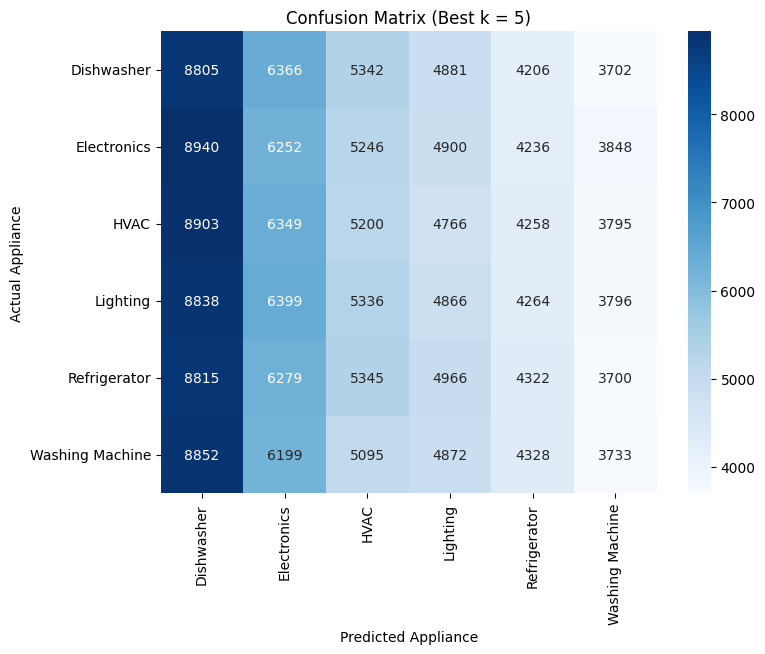

/tmp/ipython-input-3717548679.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=appliance_names, y=accuracies, palette='viridis')


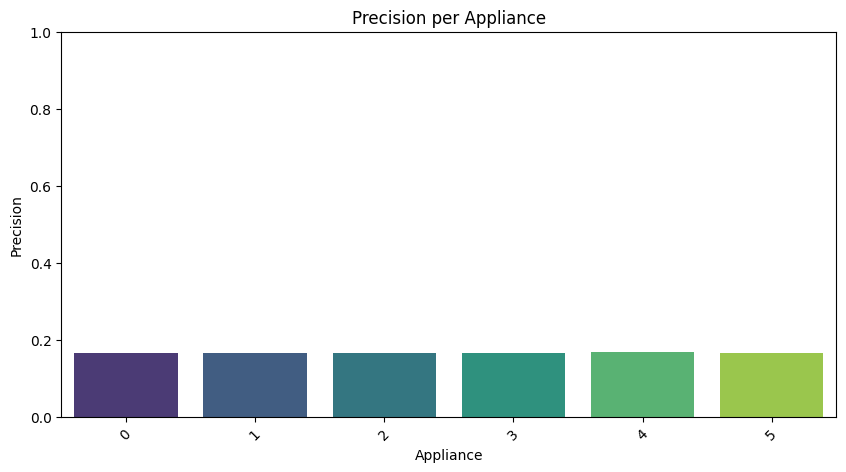

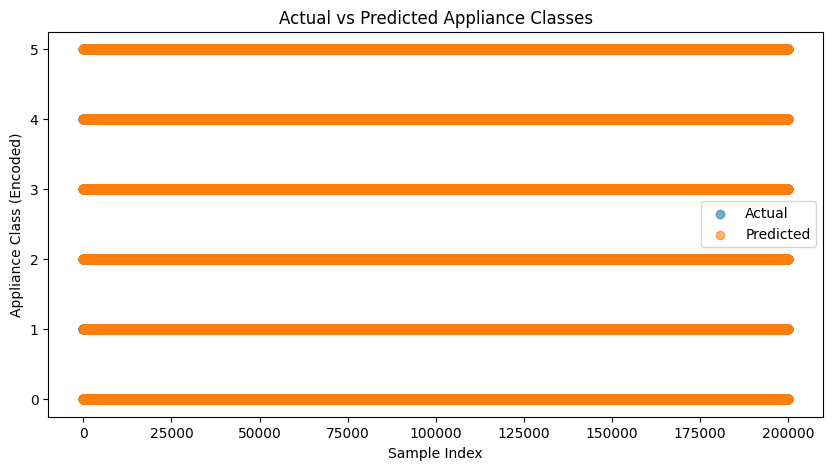

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

#Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title(f"Confusion Matrix (Best k = {'5'})")
plt.xlabel("Predicted Appliance")
plt.ylabel("Actual Appliance")
plt.show()

#Accuracy per Appliance
report = classification_report(y_test, y_pred, output_dict=True)
appliance_names = list(report.keys())[:-3]  # ignore 'accuracy', 'macro avg', 'weighted avg'
accuracies = [report[app]['precision'] for app in appliance_names]

plt.figure(figsize=(10,5))
sns.barplot(x=appliance_names, y=accuracies, palette='viridis')
plt.title("Precision per Appliance")
plt.ylabel("Precision")
plt.xlabel("Appliance")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

#Predictions vs Actual Scatter
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.6)
plt.title("Actual vs Predicted Appliance Classes")
plt.xlabel("Sample Index")
plt.ylabel("Appliance Class (Encoded)")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/smart_home_energy_usage_dataset.csv")
print(data.head())
print(data.info())


             timestamp  home_id  energy_consumption_kWh  \
0  2023-01-01 00:00:00       44                    2.87   
1  2023-01-01 01:00:00       81                    0.56   
2  2023-01-01 02:00:00       94                    4.49   
3  2023-01-01 03:00:00       20                    2.13   
4  2023-01-01 04:00:00        3                    2.74   

   temperature_setting_C occupancy_status     appliance  \
0                   22.1         Occupied  Refrigerator   
1                   15.4         Occupied          HVAC   
2                   22.4         Occupied   Electronics   
3                   24.6       Unoccupied    Dishwasher   
4                   21.4       Unoccupied          HVAC   

   usage_duration_minutes  season day_of_week  holiday  
0                     111  Spring      Sunday      0.0  
1                     103  Summer      Sunday      0.0  
2                      12  Autumn      Sunday      0.0  
3                      54  Autumn      Sunday      0.0  
4    

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['dayofweek_num'] = data['timestamp'].dt.dayofweek

In [ ]:
label_enc = LabelEncoder()
data['occupancy_status'] = label_enc.fit_transform(data['occupancy_status'])
data['season'] = label_enc.fit_transform(data['season'])
data['day_of_week'] = label_enc.fit_transform(data['day_of_week'])
data['appliance'] = label_enc.fit_transform(data['appliance'])

In [ ]:
X = data[['hour', 'dayofweek_num', 'energy_consumption_kWh',
          'temperature_setting_C', 'occupancy_status',
          'season', 'holiday']]
y = data['appliance']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [ ]:
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.16807825360849338

 Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.07      0.10      1347
           1       0.17      0.15      0.16      1343
           2       0.17      0.14      0.15      1393
           3       0.16      0.33      0.22      1449
           4       0.17      0.19      0.18      1428
           5       0.19      0.11      0.14      1423

    accuracy                           0.17      8383
   macro avg       0.17      0.17      0.16      8383
weighted avg       0.17      0.17      0.16      8383


Confusion Matrix:
 [[ 99 195 181 475 268 129]
 [118 208 178 455 243 141]
 [ 99 201 193 481 275 144]
 [127 229 178 472 296 147]
 [ 93 200 214 500 274 147]
 [ 97 211 208 488 256 163]]


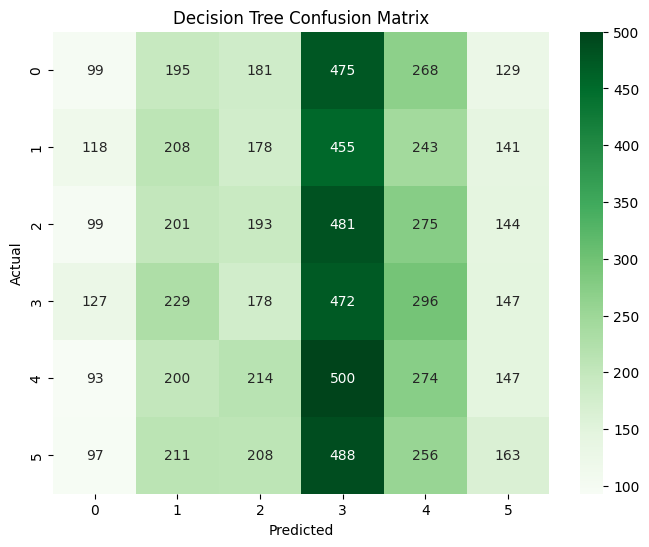

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

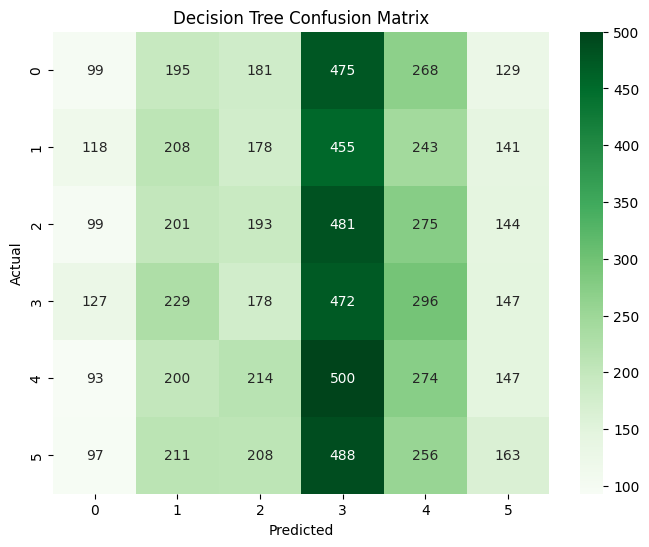

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/tmp/ipython-input-3775370845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


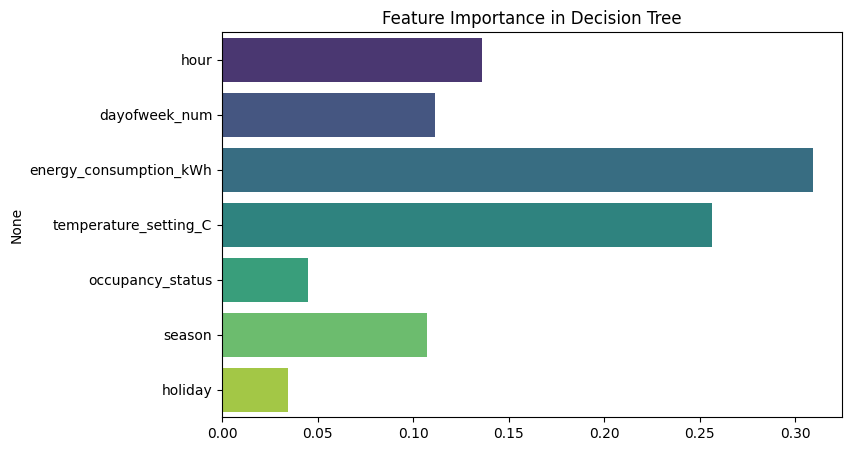

In [ ]:
importances = dt.feature_importances_
features = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance in Decision Tree")
plt.show()

In [ ]:
sample = pd.DataFrame([[9, 0, 2.5, 22, 1, 2, 0]],
                      columns=['hour','dayofweek_num','energy_consumption_kWh',
                               'temperature_setting_C','occupancy_status',
                               'season','holiday'])
predicted = dt.predict(sample)
print("Predicted appliance class:", predicted)

Predicted appliance class: [3]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("/content/smart_home_energy_usage_dataset.csv")
print(data.head())
print(data.info())


             timestamp  home_id  energy_consumption_kWh  \
0  2023-01-01 00:00:00       44                    2.87   
1  2023-01-01 01:00:00       81                    0.56   
2  2023-01-01 02:00:00       94                    4.49   
3  2023-01-01 03:00:00       20                    2.13   
4  2023-01-01 04:00:00        3                    2.74   

   temperature_setting_C occupancy_status     appliance  \
0                   22.1         Occupied  Refrigerator   
1                   15.4         Occupied          HVAC   
2                   22.4         Occupied   Electronics   
3                   24.6       Unoccupied    Dishwasher   
4                   21.4       Unoccupied          HVAC   

   usage_duration_minutes  season day_of_week  holiday  
0                   111.0  Spring      Sunday      0.0  
1                   103.0  Summer      Sunday      0.0  
2                    12.0  Autumn      Sunday      0.0  
3                    54.0  Autumn      Sunday      0.0  
4    

In [3]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['dayofweek_num'] = data['timestamp'].dt.dayofweek


In [4]:
label_enc = LabelEncoder()
data['occupancy_status'] = label_enc.fit_transform(data['occupancy_status'])
data['season'] = label_enc.fit_transform(data['season'])
data['day_of_week'] = label_enc.fit_transform(data['day_of_week'])
data['appliance'] = label_enc.fit_transform(data['appliance'])


In [5]:
X = data[['hour', 'dayofweek_num', 'energy_consumption_kWh',
          'temperature_setting_C', 'occupancy_status',
          'season', 'holiday']]
y = data['appliance']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [8]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.1673281578925472

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.17      0.17     20033
           1       0.16      0.17      0.16     19885
           2       0.17      0.16      0.16     20052
           3       0.17      0.18      0.18     20143
           4       0.17      0.18      0.17     20030
           5       0.17      0.16      0.16     20040

    accuracy                           0.17    120183
   macro avg       0.17      0.17      0.17    120183
weighted avg       0.17      0.17      0.17    120183


Confusion Matrix:
 [[3316 3529 3187 3451 3461 3089]
 [3322 3314 3094 3545 3523 3087]
 [3179 3475 3148 3608 3578 3064]
 [3175 3387 3277 3638 3540 3126]
 [3222 3499 3046 3556 3560 3147]
 [3315 3345 3189 3526 3531 3134]]


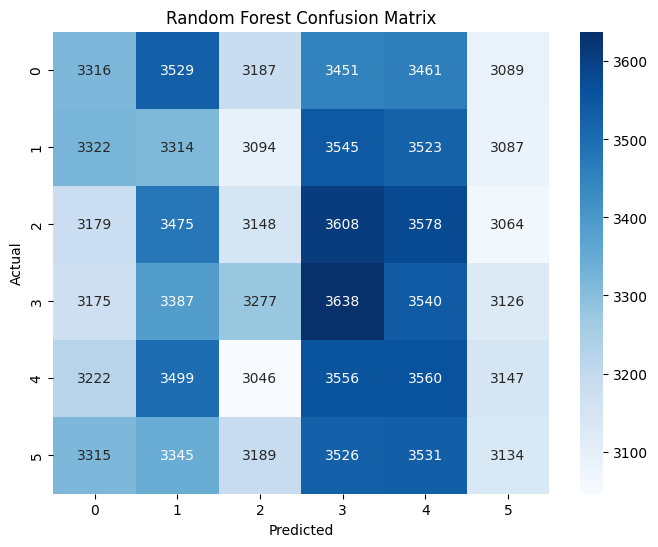

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-309001916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


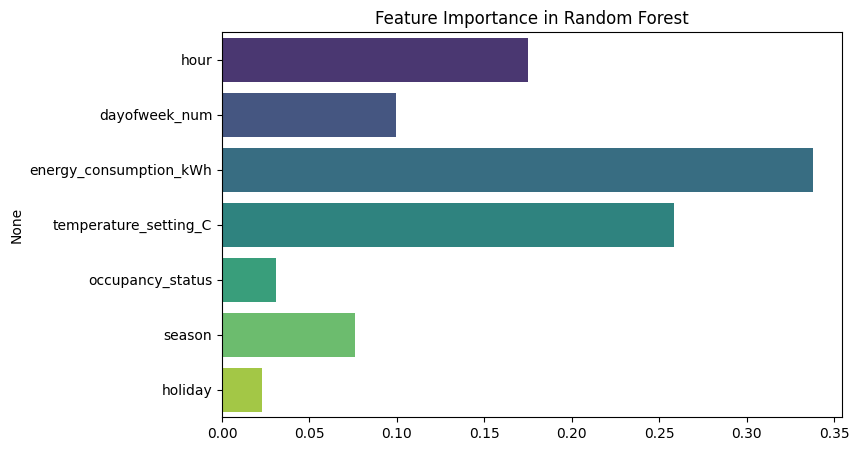

In [10]:
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.show()


In [11]:
sample = pd.DataFrame([[9, 0, 2.5, 22, 1, 2, 0]],
                      columns=['hour','dayofweek_num','energy_consumption_kWh',
                               'temperature_setting_C','occupancy_status',
                               'season','holiday'])
predicted = rf.predict(sample)
print("Predicted appliance class:", predicted)


Predicted appliance class: [4]
